In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('heart.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

In [5]:
# EXPLORATORY DATA ANALYSIS AND VISUALISATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


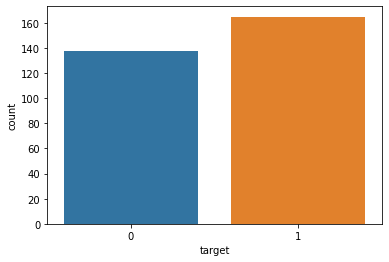

In [11]:
# TOTAL COUNTS PER TARGET VALUE
sns.countplot(data=df,x='target')

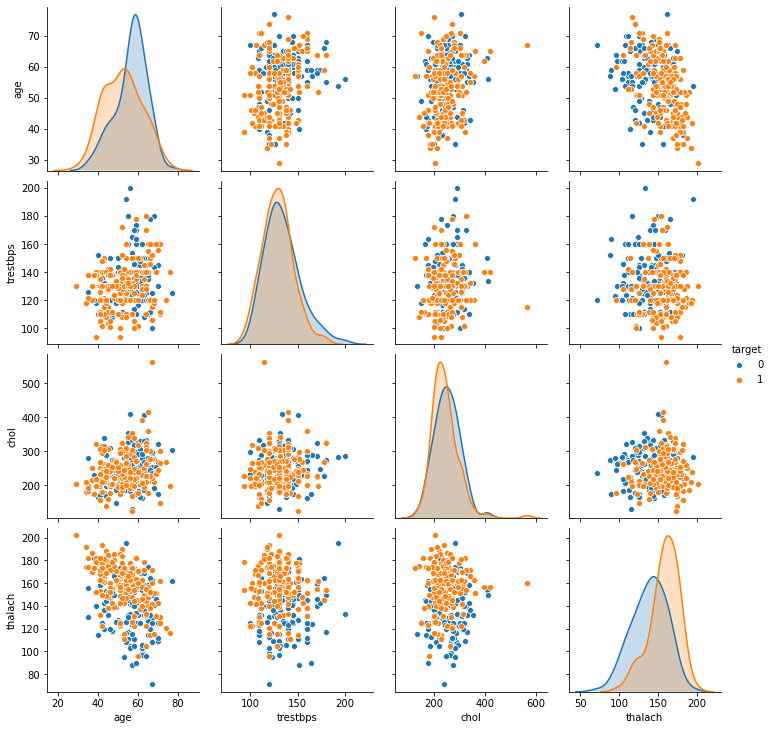

In [14]:
#PAIRPLOT TO EXPLORE RELATIONS
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

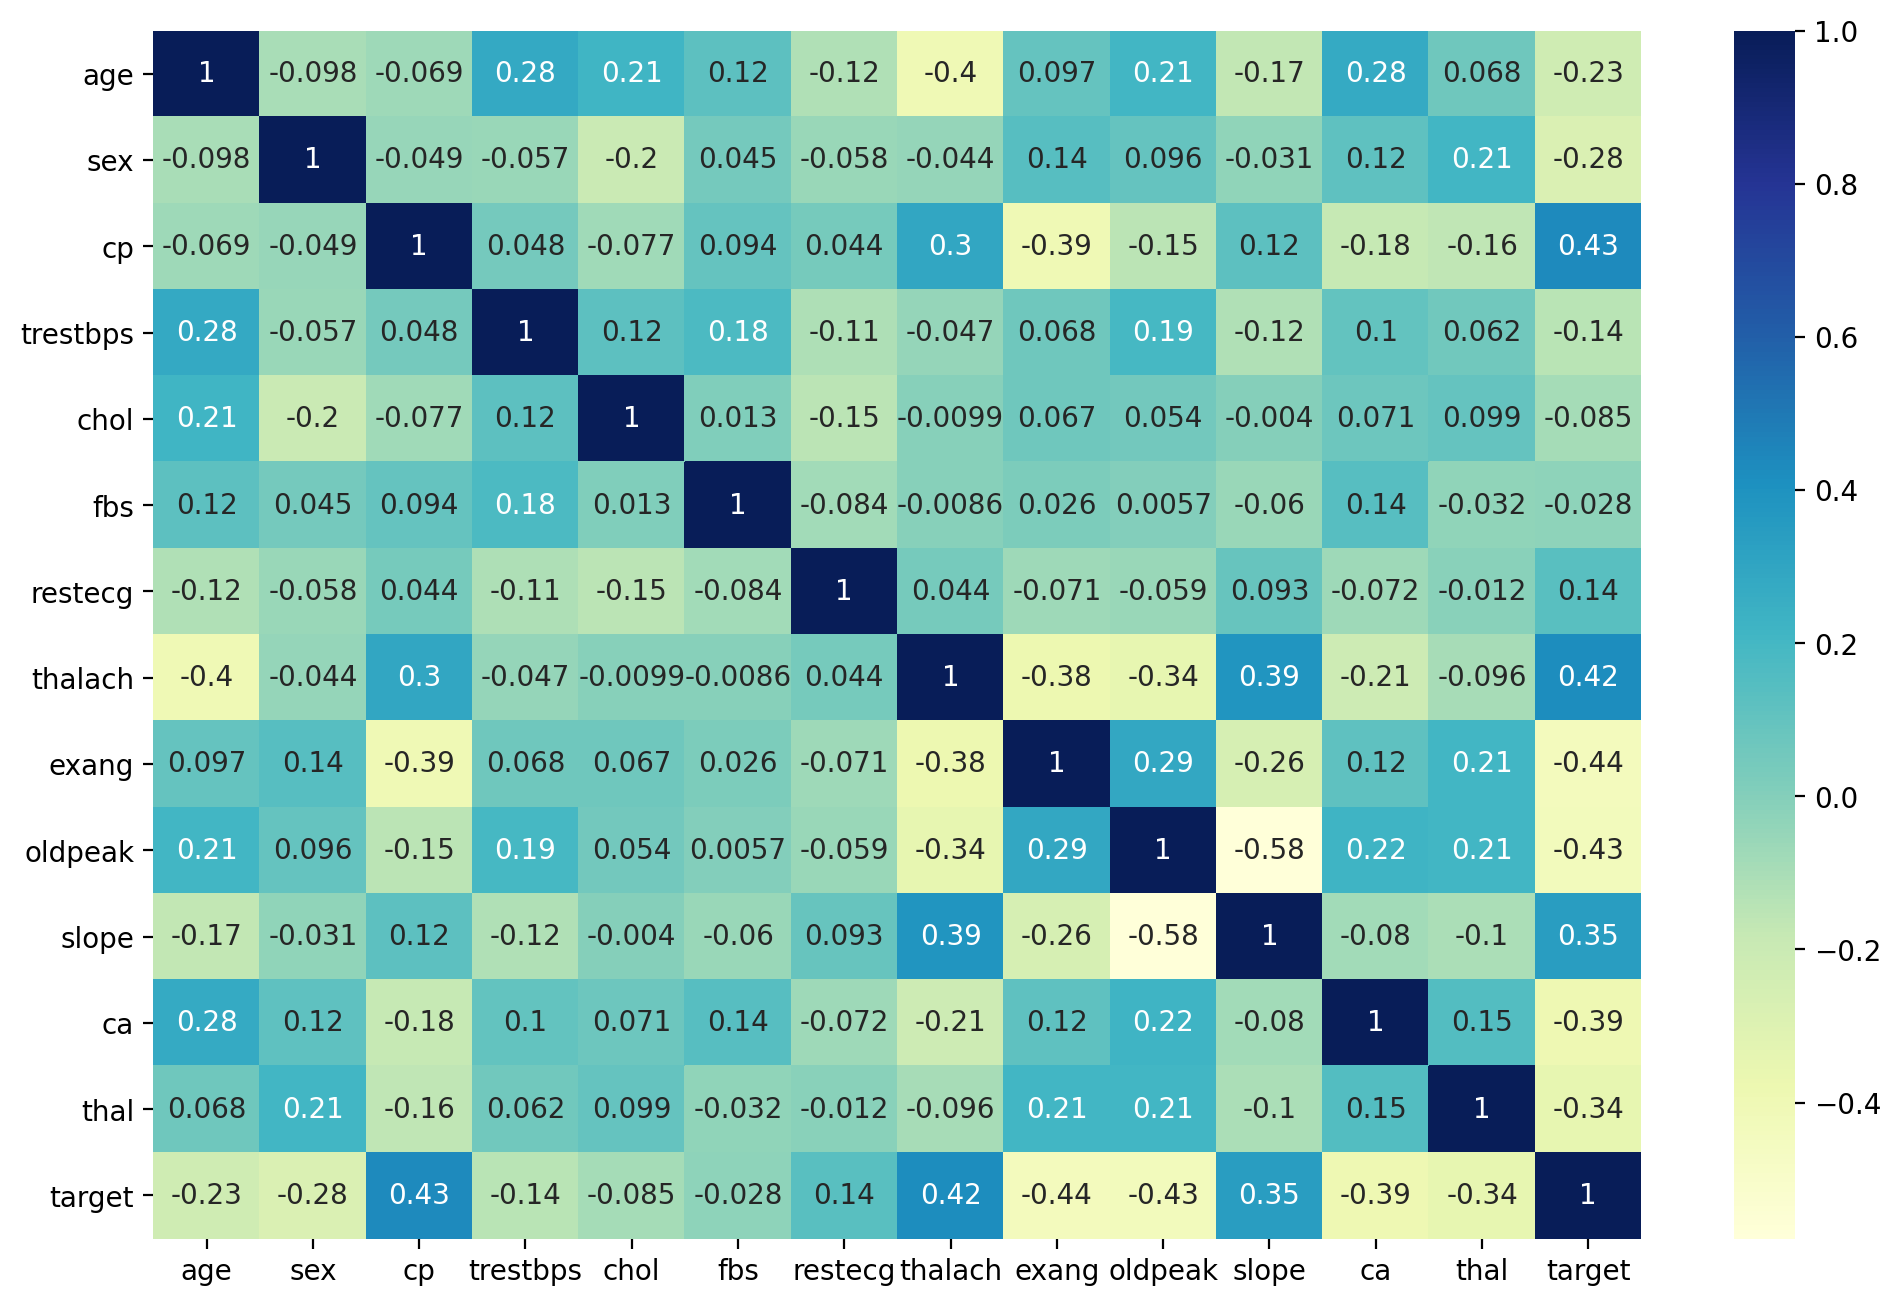

In [17]:
# CORRELATION HEATMAP
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [20]:
# DATA PREPROCESSING
X=df.drop('target',axis=1)

In [21]:
y=df['target']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [32]:
# MODEL TRAINING
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
model=LogisticRegression()
C = np.logspace(0, 4, 10)

In [34]:
grid_params={'penalty':['l1','l2','elasticnet'],
             'C':C}

In [37]:
grid_model=GridSearchCV(model,grid_params,scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [38]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................................ C=1.0, penalty=l2, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-te

[CV] ......... C=2.7825594022071245, penalty=elasticnet, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] .................. C=7.742636826811269, penalty=l1, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] .................. C=7.742636826811269, penalty=l1, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] .................. C=7.742636826811269, penalty=l1, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] .................. C=7.742636826811269, penalty=l1, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] .................. C=7.742636826811269, penalty=l1, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] .................. C=7.742636826811269, penalty=l2, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] .

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

[CV] .................. C=59.94842503189409, penalty=l1, total=   0.0s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] .................. C=59.94842503189409, penalty=l2, total=   0.0s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] .................. C=59.94842503189409, penalty=l2, total=   0.0s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] .................. C=59.94842503189409, penalty=l2, total=   0.0s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] .................. C=59.94842503189409, penalty=l2, total=   0.0s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] .................. C=59.94842503189409, penalty=l2, total=   0.0s
[CV] C=59.94842503189409, penalty=elasticnet .........................
[CV] .......... C=59.94842503189409, penalty=elasticnet, total=   0.0s
[CV] C=59.94842503189409, penalty=elasticnet .........................
[CV] .

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV] ................. C=464.15888336127773, penalty=l2, total=   0.0s
[CV] C=464.15888336127773, penalty=l2 ................................
[CV] ................. C=464.15888336127773, penalty=l2, total=   0.0s
[CV] C=464.15888336127773, penalty=l2 ................................
[CV] ................. C=464.15888336127773, penalty=l2, total=   0.0s
[CV] C=464.15888336127773, penalty=elasticnet ........................
[CV] ......... C=464.15888336127773, penalty=elasticnet, total=   0.0s
[CV] C=464.15888336127773, penalty=elasticnet ........................
[CV] ......... C=464.15888336127773, penalty=elasticnet, total=   0.0s
[CV] C=464.15888336127773, penalty=elasticnet ........................
[CV] ......... C=464.15888336127773, penalty=elasticnet, total=   0.0s
[CV] C=464.15888336127773, penalty=elasticnet ........................
[CV] ......... C=464.15888336127773, penalty=elasticnet, total=   0.0s
[CV] C=464.15888336127773, penalty=elasticnet ........................
[CV] .

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=elasticnet .........................
[CV] .......... C=3593.813663804626, penalty=elasticnet, total=   0.0s
[CV] C=3593.813663804626, penalty=elasticnet .........................
[CV] .......... C=3593.813663804626, penalty=elasticnet, total=   0.0s
[CV] C=3593.813663804626, penalty=elasticnet .........................
[CV] .......... C=3593.813663804626, penalty=elasticnet, total=   0.0s
[CV] C=3593.813663804626, penalty=elasticnet .........................
[CV] .......... C=3593.813663804626, penalty=elasticnet, total=   0.0s
[CV] C=3593.813663804626, penalty=elasticnet .........................
[CV] .......... C=3593.813663804626, penalty=elasticnet, total=   0.0s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] .

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

In [42]:
log_model=LogisticRegression(C=2.782,penalty='l2')

In [43]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=2.782)

In [44]:
log_model.coef_

array([[-0.06862389, -0.76677183,  0.92401143, -0.27433571, -0.22673402,
         0.04684475,  0.12315557,  0.44657071, -0.4341609 , -0.53865954,
         0.39453479, -0.88122926, -0.58988829]])

In [33]:
#PLOTTING THE COEFFICENTS

In [45]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [46]:
coefs = coefs.sort_values()

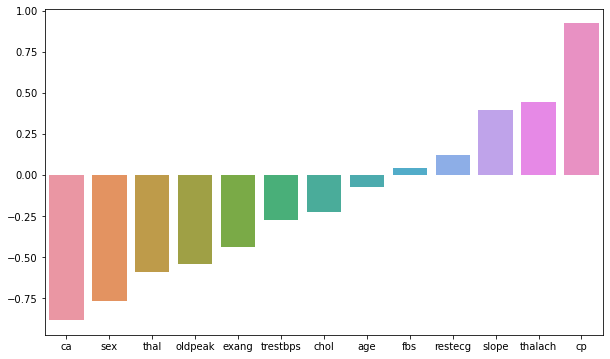

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [48]:
# ANALYSING PERFORMANCE METRICS
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [49]:
preds=log_model.predict(scaled_X_test)
confusion_matrix(y_test,preds)

array([[12,  3],
       [ 2, 14]], dtype=int64)

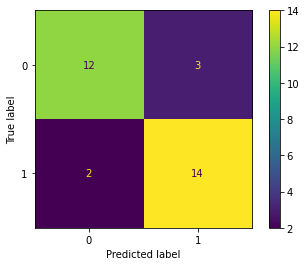

In [50]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [52]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [53]:
# PRECISION CURVE
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

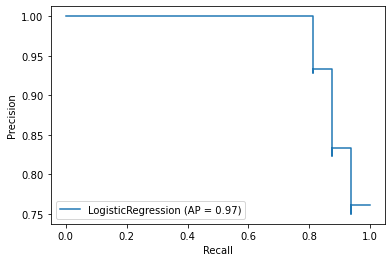

In [54]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

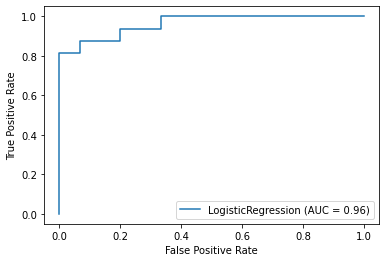

In [55]:
# ROC CURVE
plot_roc_curve(log_model,scaled_X_test,y_test)

In [56]:
#TESTING MODEL ON RANDOM DATA
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [63]:
pred=log_model.predict_proba(patient)

In [64]:
pred

array([[1.00000000e+00, 7.75292118e-25]])